In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 45 TT balls, 211130

In [2]:
data_stripes = pd.read_excel('211130_summary.xlsx', sheet_name = 'curtain_2cm')

In [3]:
idxs_stripes = ['211130_2.2', '211130_3.2', '211130_4.2', '211130_5.2', '211130_6.2', '211130_7.2', '211130_8.2']

In [4]:
peak_force_stripes = []
for idx in idxs_stripes:
    peak_force_stripes.append(np.max(data_stripes[idx][2:]))
print(np.mean(peak_force_stripes))
print(np.std(peak_force_stripes)/np.sqrt(len(peak_force_stripes)))

0.037214285714285714
0.0019380643163890716


In [5]:
data_TTball = pd.read_excel('211130_summary.xlsx', sheet_name = 'TTball')

In [6]:
idx_TTball = ['211130_1.2', '211130_2.2', '211130_4.2', '211130_5.2']
idx_disp_TTball = ['211130_1.1', '211130_2.1', '211130_4.1', '211130_5.1']

In [7]:
forces_at_5mm = []
for idx1, idx2 in zip(idx_disp_TTball, idx_TTball):
    loc = np.argmin(np.array(np.abs(data_TTball[idx1][2:] - 5)))
    forces_at_5mm.append((data_TTball[idx2][2:])[loc])
print(np.mean(forces_at_5mm))
print(np.std(forces_at_5mm)/np.sqrt(len(forces_at_5mm)))

0.15207500000000002
0.0006967558754685866


In [8]:
F_at_5mm = 0.15207500000000002

In [9]:
data_unentangled = pd.read_excel('211130_summary.xlsx', sheet_name = 'unentangled')
data_entangled = pd.read_excel('211130_summary.xlsx', sheet_name = 'entangled')

X_list = ['211130_1.1', '211201_1.1', '211201_2.1']
F_list = ['211130_1.2', '211201_1.2', '211201_2.2']
x_unentangled = []
f_unentangled = []
x_entangled = []
f_entangled = []
for idx_x, idx_f in zip(X_list, F_list):
    x_unentangled.append(np.array(data_unentangled[idx_x][2:]).astype(float))
    f = np.array(data_unentangled[idx_f][2:])/F_at_5mm
    f = f - f[0]
    f_unentangled.append(f.astype(float))
    x_entangled.append(np.array(data_entangled[idx_x][2:]).astype(float))
    f = np.array(data_entangled[idx_f][2:])/F_at_5mm
    f = f - f[0]
    f_entangled.append(f.astype(float))

mean_x_axis = [i for i in range(110)]
ys_interp_u = [np.interp(mean_x_axis, x_unentangled[i], f_unentangled[i]) for i in range(len(x_unentangled))]
mean_y_axis_u = np.mean(ys_interp_u, axis=0)
ys_interp_e = [np.interp(mean_x_axis, x_entangled[i], f_entangled[i]) for i in range(len(x_entangled))]
mean_y_axis_e = np.mean(ys_interp_e, axis=0)

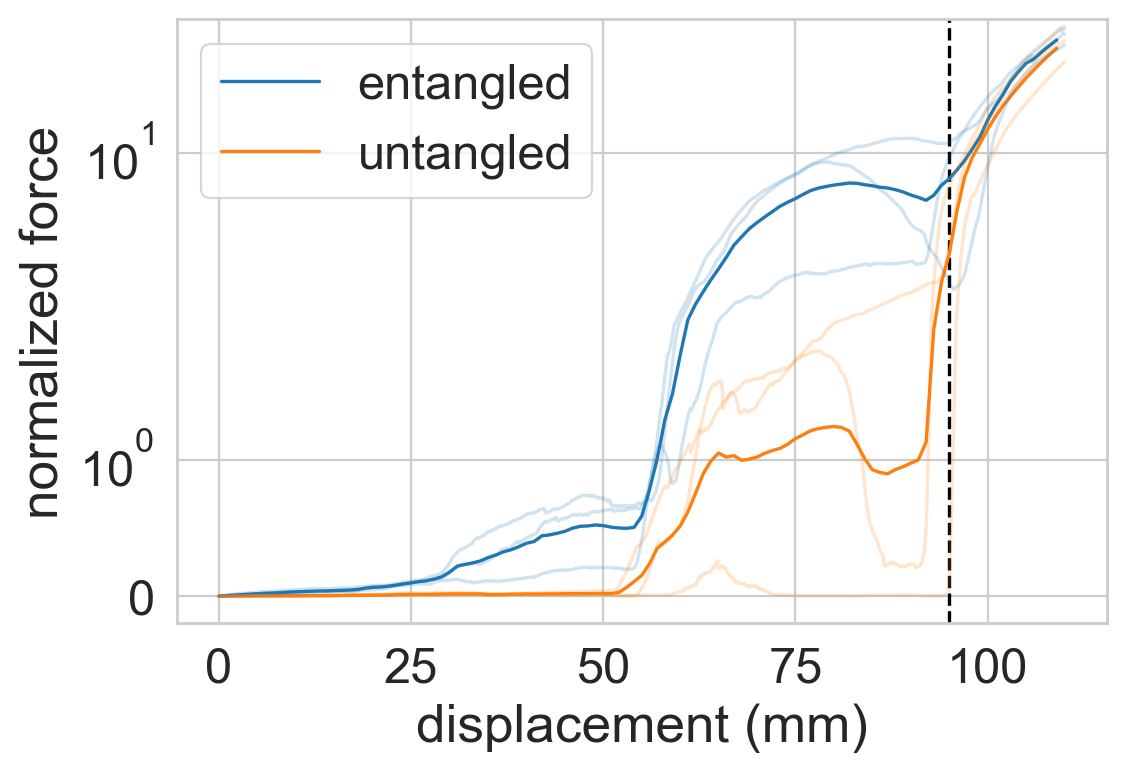

In [10]:
sns.set_style("whitegrid")
sns.set_context('paper', font_scale = 2)
plt.figure(dpi = 200)
plt.plot(mean_x_axis, mean_y_axis_e, label = 'entangled', color = 'C0')
plt.plot(mean_x_axis, mean_y_axis_u, label = 'untangled', color = 'C1')
for xu, fu, xe, fe in zip(x_unentangled, f_unentangled, x_entangled, f_entangled):
    plt.plot(xe, fe, color = 'C0', alpha = 0.2)
    plt.plot(xu, fu, color = 'C1', alpha = 0.2)
plt.xlabel('displacement (mm)')
plt.ylabel('normalized force')
plt.vlines(95, -.2, 35, color = 'black', linestyle = '--')
plt.ylim([-.2,35])
plt.yscale('symlog')
plt.legend()
plt.savefig('entangled.png', bbox_inches='tight', transparent=True)
plt.show()